<a href="https://colab.research.google.com/github/keshavnirwan/Machine-Learning-Algorithms/blob/main/Face%20Mask%20Detection%202%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:09<00:00, 22.0MB/s]
100% 163M/163M [00:09<00:00, 18.4MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_735.jpg', 'with_mask_2048.jpg', 'with_mask_3049.jpg', 'with_mask_815.jpg', 'with_mask_2281.jpg']
['with_mask_3492.jpg', 'with_mask_2356.jpg', 'with_mask_3446.jpg', 'with_mask_537.jpg', 'with_mask_232.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1477.jpg', 'without_mask_661.jpg', 'without_mask_951.jpg', 'without_mask_1885.jpg', 'without_mask_3081.jpg']
['without_mask_1212.jpg', 'without_mask_1660.jpg', 'without_mask_2006.jpg', 'without_mask_2912.jpg', 'without_mask_1822.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828



with mask --> 1

without mask --> 0

In [10]:

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))


3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

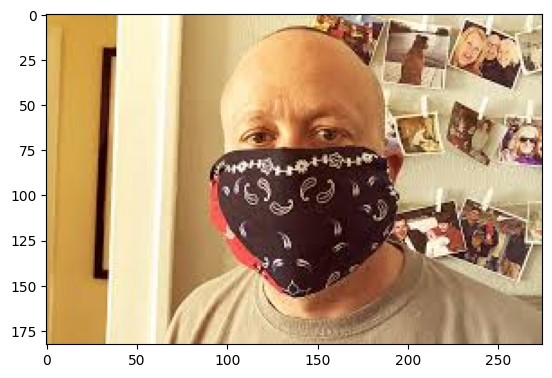

In [14]:
img = mpimg.imread('/content/data/with_mask/with_mask_3688.jpg')
imgplot = plt.imshow(img)
plt.show()

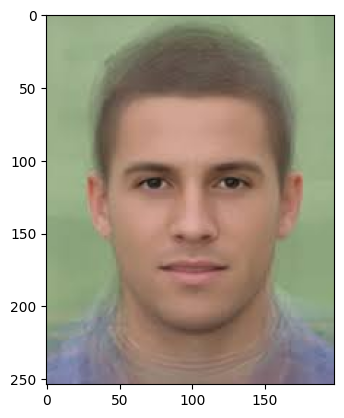

In [15]:
img = mpimg.imread('/content/data/without_mask/without_mask_1134.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

Resize the Images

Convert the images to numpy arrays

In [16]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[ 55,  63, 102],
        [ 44,  52,  87],
        [ 42,  52,  77],
        ...,
        [ 47,  78, 142],
        [ 77, 108, 172],
        [ 62,  93, 157]],

       [[ 51,  58,  99],
        [ 44,  52,  88],
        [ 43,  53,  78],
        ...,
        [ 42,  73, 137],
        [ 72, 103, 167],
        [ 49,  80, 144]],

       [[ 45,  52,  95],
        [ 43,  51,  88],
        [ 42,  52,  79],
        ...,
        [ 37,  68, 132],
        [ 67,  98, 162],
        [ 44,  75, 139]],

       ...,

       [[162, 132, 130],
        [160, 130, 128],
        [157, 128, 130],
        ...,
        [177, 134, 143],
        [177, 134, 143],
        [176, 133, 142]],

       [[161, 131, 129],
        [160, 130, 128],
        [156, 128, 127],
        ...,
        [176, 133, 142],
        [175, 132, 141],
        [176, 133, 142]],

       [[161, 132, 128],
        [159, 129, 127],
        [156, 128, 127],
        ...,
        [174, 131, 140],
        [175, 132, 141],
        [176, 133, 142]]], dtype=uint8)
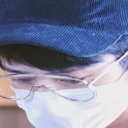

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
X = np.array(data)
Y = np.array(labels)

In [23]:
len(labels)

7553

In [24]:
type(X)

numpy.ndarray

In [25]:
type(Y)

numpy.ndarray

In [26]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(Y)

[1 1 1 ... 0 0 0]


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
#scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [31]:
X_train_scaled[0]

array([[[0.52156863, 0.48627451, 0.49019608],
        [0.50980392, 0.4745098 , 0.48235294],
        [0.50588235, 0.47058824, 0.4745098 ],
        ...,
        [0.25490196, 0.28235294, 0.31764706],
        [0.25098039, 0.27843137, 0.30980392],
        [0.24705882, 0.2745098 , 0.30588235]],

       [[0.53333333, 0.49411765, 0.49411765],
        [0.5372549 , 0.49803922, 0.49803922],
        [0.54117647, 0.50588235, 0.50588235],
        ...,
        [0.25490196, 0.28627451, 0.32941176],
        [0.24705882, 0.2745098 , 0.32156863],
        [0.24313725, 0.2745098 , 0.31764706]],

       [[0.54117647, 0.50196078, 0.49803922],
        [0.54509804, 0.50588235, 0.50196078],
        [0.55294118, 0.50980392, 0.50588235],
        ...,
        [0.2627451 , 0.29803922, 0.35686275],
        [0.25098039, 0.28627451, 0.34509804],
        [0.24705882, 0.2745098 , 0.3372549 ]],

       ...,

       [[0.49803922, 0.43137255, 0.37254902],
        [0.42745098, 0.36470588, 0.30980392],
        [0.34509804, 0

**Building CNN**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - acc: 0.7485 - loss: 0.5894 - val_acc: 0.8909 - val_loss: 0.2563
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - acc: 0.8906 - loss: 0.2919 - val_acc: 0.9025 - val_loss: 0.2306
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9045 - loss: 0.2434 - val_acc: 0.9140 - val_loss: 0.1941
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9359 - loss: 0.1776 - val_acc: 0.9289 - val_loss: 0.1925
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9355 - loss: 0.1615 - val_acc: 0.9405 - val_loss: 0.1690


**ACCURACY**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9193 - loss: 0.1892
Test Accuracy = 0.9199205636978149


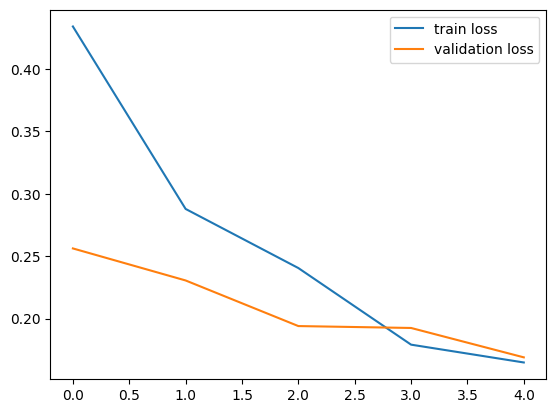

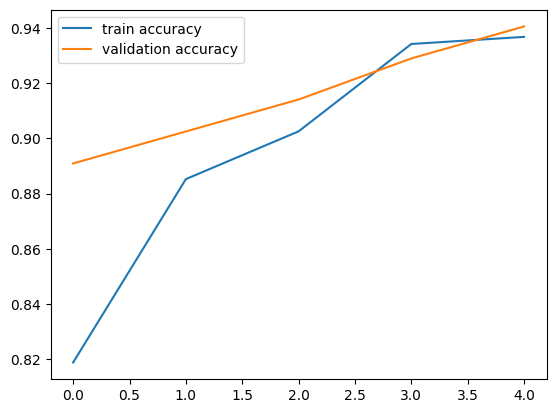

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/with_mask/with_mask_1.jpg


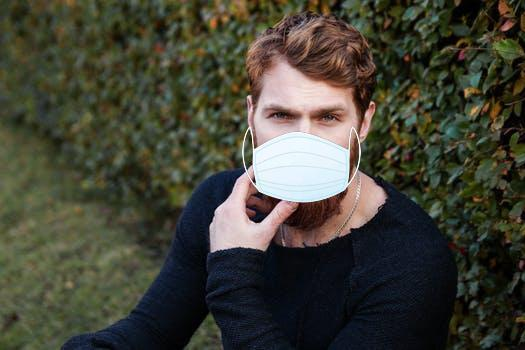

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
[[0.31690952 0.6128254 ]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if (input_pred_label == 0):

  print('The person in the image is not wearing a mask')

if (input_pred_label == 1):

  print('The person in the image is wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_100.jpg


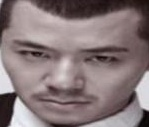

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.5762661 0.4897343]]
0
The person in the image is not wearing a mask


In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if (input_pred_label == 0):

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')

Path of the image to be predicted: /content/data/with_mask/with_mask_1005.jpg


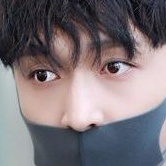

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.25800446 0.73576444]]
1
The person in the image is wearing a mask


In [52]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if (input_pred_label == 0):

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')